In [1]:
import pandas as pd
import numpy as np
import scipy.stats
from sklearn.model_selection import train_test_split

C:\Users\fdsaf\AppData\Local\Temp\ipykernel_19800\1031644513.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
perch_data = pd.read_csv('./perch_data.csv', index_col=0)
perch_df = perch_data.copy()
perch_df

,length,weight
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0
3,16.2,51.5
4,17.4,70.0
5,18.0,100.0
6,18.7,78.0
7,19.0,80.0
8,19.6,85.0
9,20.0,85.0


In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_df[['length']], perch_df[['weight']], random_state=42)

In [4]:
from sklearn.neighbors import KNeighborsRegressor
knr3 = KNeighborsRegressor(n_neighbors=3)
knr3.fit(train_input, train_target)
knr3.score(test_input, test_target)

0.9746459963987609

In [5]:
# 길이가 50인 농어의 무게 예측
print(knr3.predict([[50]]))

[[1033.33333333]]


c:\Users\fdsaf\Desktop\개인학습\ML_study\ML\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


c:\Users\fdsaf\Desktop\개인학습\ML_study\ML\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\fdsaf\Desktop\개인학습\ML_study\ML\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


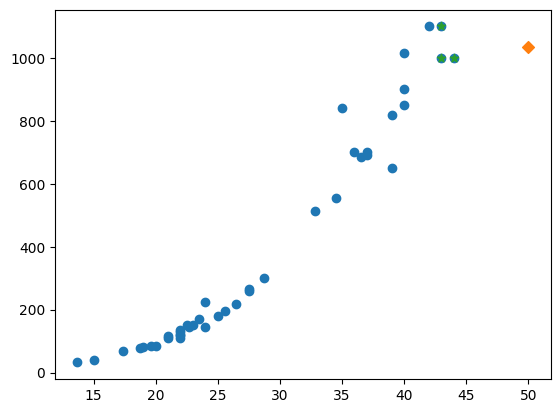

In [6]:
# 산점도로 확인
import matplotlib.pyplot as plt

distances, indexes = knr3.kneighbors([[50]])
plt.scatter(train_input['length'], train_target['weight'])
plt.scatter(50, knr3.predict([[50]]), marker='D')
plt.scatter(train_input['length'].iloc[indexes[0]], train_target['weight'].iloc[indexes[0]], marker='*')

그래프 상으로 볼때, 범위에서 벗어나는 경우에는 최근접이웃회귀로는 예측하기 힘들다.

In [7]:
# 표준화 한 경우
from scipy import stats


def to_std(length):
    return (length-mean_length)/std_length


def from_std(weight):
    return weight * std_weight + mean_weight


perch_df['SL'] = stats.zscore(perch_df['length'])
perch_df['SW'] = stats.zscore(perch_df['weight'])
mean_length, std_length = perch_df['length'].mean(), perch_df['length'].std()
mean_weight, std_weight = perch_df['weight'].mean(), perch_df['weight'].std()

standard_train_input, standard_test_input, standard_train_target, standard_test_target = train_test_split(perch_df[['SL']], perch_df['SW'],random_state=42)

standard_knr3 = KNeighborsRegressor(n_neighbors=3)
standard_knr3.fit(standard_train_input, standard_train_target)

print(from_std(standard_knr3.predict(to_std([[50]]))))


[1039.22570726]


c:\Users\fdsaf\Desktop\개인학습\ML_study\ML\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


c:\Users\fdsaf\Desktop\개인학습\ML_study\ML\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\fdsaf\Desktop\개인학습\ML_study\ML\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


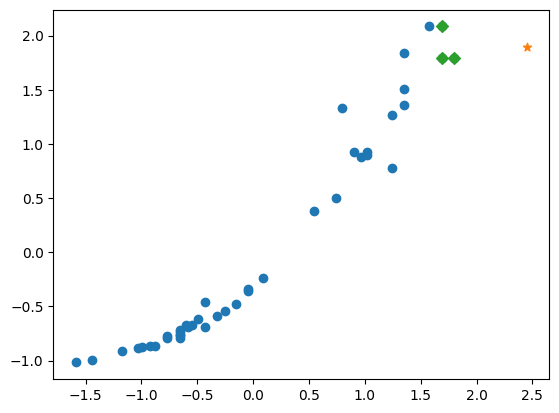

In [8]:
distances, indexes = standard_knr3.kneighbors([[to_std(50)]])

plt.scatter(standard_train_input, standard_train_target)
plt.scatter(to_std(50), standard_knr3.predict([[to_std(50)]]), marker = '*')
plt.scatter(standard_train_input.iloc[indexes[0]], standard_train_target.iloc[indexes[0]], marker='D')


## 선형 회귀
특성이 하나인 경우 어떤 직선을 학습하는 알고리즘

0.9398463339976041


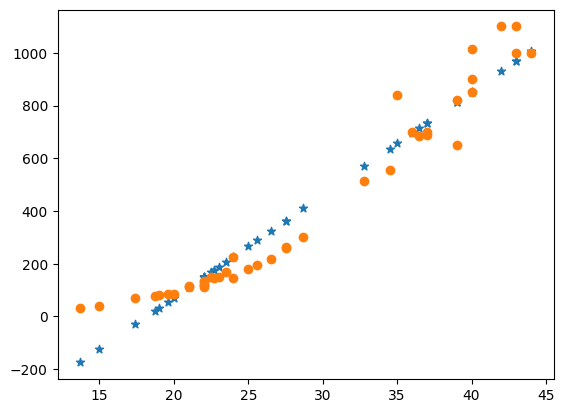

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target['weight']))
plt.scatter(train_input, lr.predict(train_input), marker='*')
plt.scatter(train_input, train_target)


In [10]:
# 객체에 계수와 상수항이 저장되어있다. `_`는 모델을 통해 학습된 값이라는 의미이다.
print(lr.coef_, lr.intercept_)

[[39.01714496]] [-709.01864495]


계수와 상수항 같은 것들을 `model parameter`이라고 한다. k-최근접 이웃 알고리즘에는 모델 파라미터가 없고, 훈련세트를 저장할 뿐이다. 이런것을 `사례 기반 학습` 이라고 한다.

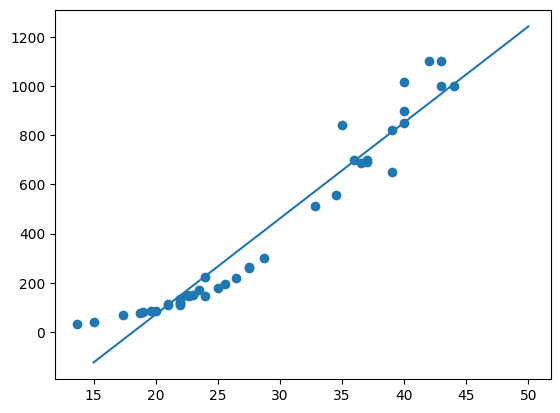

In [11]:
plt.scatter(train_input, train_target)
plt.plot([15, 50], [15*lr.coef_[0] + lr.intercept_[0], 50*lr.coef_[0] + lr.intercept_[0]])

In [19]:
# 2차 선형 회귀
train_input['length^2'] = train_input['length']**2
lr.fit(train_input, train_target)
print(f'score : {lr.score(train_input, train_target)}')
print(lr.coef_, lr.intercept_)
print(f'예상값 : {lr.predict([[50, 50**2]])}')


score : 0.9706807451768623
[[-21.55792498   1.01433211]] [116.05021078]
예상값 : [[1573.98423528]]


c:\Users\fdsaf\Desktop\개인학습\ML_study\ML\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


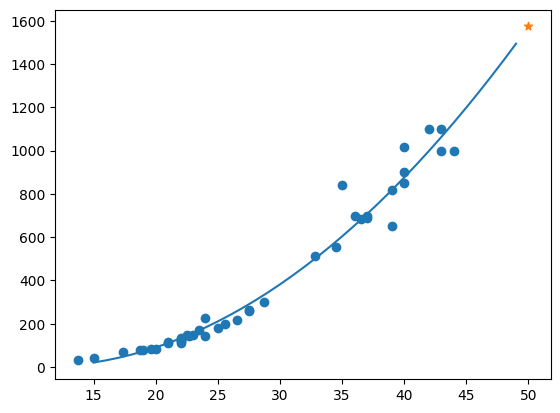

In [13]:
plt.scatter(train_input['length'], train_target)
point = np.arange(15,50)
plt.plot(point, 1.014*point**2 - 21.56*point + 116.1)
plt.scatter(50, 1574, marker='*')

In [20]:
# 3차 선형 회귀
train_input['length^3'] = train_input['length']**3
lr.fit(train_input, train_target)
print(f'score : {lr.score(train_input, train_target)}')
print(lr.coef_, lr.intercept_)
print(f'예상값 : {lr.predict([[50, 50**2, 50**3]])}')

score : 0.9729178478354533
[[-9.05932876e+01  3.54762430e+00 -2.93594164e-02]] [709.94795075]
예상값 : [[1379.41727785]]


c:\Users\fdsaf\Desktop\개인학습\ML_study\ML\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


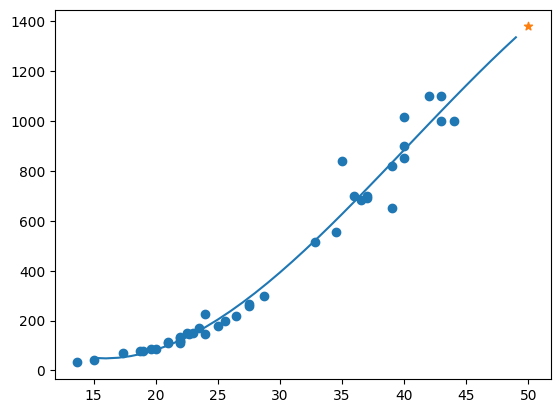

In [24]:
plt.scatter(train_input['length'], train_target)
point = np.arange(15,50)
plt.plot(point, -0.02936*point**3 + 3.548*point**2 - 90.59*point + 709.9)
plt.scatter(50, 1379, marker='*')